# Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    !pip install -U tqdm
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Tensors and Operations
## Tensors
- TensorFlow’s API revolves around **tensors**, which flow from operation to operation - hence the name TensorFlow. 
- A tensor is very similar to a **NumPy ndarray**: it is usually a multidimensional array, but it can also hold a scalar.
- You can create a tensor with `tf.constant()`.

In [2]:
tf.constant(value=[[1., 2., 3.], [4., 5., 6.]]) # matrix

<tf.Tensor: id=0, shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [3]:
tf.constant(value=42) # scaler

<tf.Tensor: id=1, shape=(), dtype=int32, numpy=42>

In [4]:
t = tf.constant([[1., 2., 3.], [4., 5., 6.]])
t

<tf.Tensor: id=2, shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [5]:
t.shape, t.dtype

(TensorShape([2, 3]), tf.float32)

- Indexing is very similar to Numpy.

In [6]:
t[:, 1:]

<tf.Tensor: id=6, shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [7]:
t[..., 1, tf.newaxis]

<tf.Tensor: id=10, shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

- All sorts of tensor operations are available.

In [8]:
t + 10

<tf.Tensor: id=12, shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [9]:
tf.add(t, 10)

<tf.Tensor: id=14, shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [10]:
tf.square(t)

<tf.Tensor: id=15, shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [11]:
t @ tf.transpose(t)

<tf.Tensor: id=18, shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [12]:
tf.matmul(t, tf.transpose(t))

<tf.Tensor: id=21, shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

## Using `keras.backend`
- The Keras API has its own low-level API, located in `keras.backend`. 
- It includes functions like `square()`, `exp()`, and `sqrt()`. 
- In `tf.keras`, these functions generally just call the corresponding TensorFlow operations.

In [13]:
from tensorflow import keras

In [14]:
K = keras.backend

In [15]:
K.square(K.transpose(t)) + 10

<tf.Tensor: id=26, shape=(3, 2), dtype=float32, numpy=
array([[11., 26.],
       [14., 35.],
       [19., 46.]], dtype=float32)>

## Tensors and Numpy
- Tensors play nice with NumPy: you can create a tensor from a NumPy array, and vice versa. 
- You can even apply TensorFlow operations to NumPy arrays and NumPy operations to tensors.

In [16]:
a = np.array([2., 4., 5.])
tf.constant(a)

<tf.Tensor: id=27, shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [17]:
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [18]:
np.array(t)

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [19]:
tf.square(a)

<tf.Tensor: id=29, shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [20]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

## Type Conversions
- Type conversions can significantly hurt performance, and they can easily go unnoticed when they are done automatically. 
- To avoid this, TensorFlow **does not** perform any type conversions automatically: it just raises an exception if you try to execute an operation on tensors with incompatible types.

In [21]:
tf.constant(2.0).dtype, tf.constant(40).dtype

(tf.float32, tf.int32)

In [22]:
try:
    tf.constant(2.0) + tf.constant(40)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2] name: add/


In [23]:
try:
    tf.constant(2.0) + tf.constant(40., dtype=tf.float64)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2] name: add/


- We can use `tf.cast()` to convert types.

In [24]:
tf.constant(2.0) + tf.cast(tf.constant(40), tf.constant(2.0).dtype)

<tf.Tensor: id=40, shape=(), dtype=float32, numpy=42.0>

## Strings

In [25]:
tf.constant(b"hello world")

<tf.Tensor: id=41, shape=(), dtype=string, numpy=b'hello world'>

In [26]:
tf.constant(b"hello world").dtype

tf.string

In [27]:
tf.constant("café")

<tf.Tensor: id=43, shape=(), dtype=string, numpy=b'caf\xc3\xa9'>

In [28]:
u = tf.constant([ord(c) for c in "café"]) # get the unicode for every letter
u

<tf.Tensor: id=44, shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233], dtype=int32)>

In [29]:
b = tf.strings.unicode_encode(input=u, output_encoding='UTF-8')
tf.strings.length(input=b, unit='UTF8_CHAR')

<tf.Tensor: id=55, shape=(), dtype=int32, numpy=4>

In [30]:
tf.strings.unicode_decode(b, "UTF-8")

<tf.Tensor: id=59, shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233], dtype=int32)>

## Variables
- The `tf.Tensor` values we’ve seen so far are **immutable**: you cannot modify them.
- What we need is a `tf.Variable`.
    - A  `tf.Variable`  acts much like a `tf.Tensor`: you can perform the same operations with it, it plays nicely with NumPy as well, and it is just as picky with types. 
    - But it can also be modified in place using the `assign()` method (or `assign_add()` or `assign_sub()`, which increment or decrement the variable by the given value). 

In [31]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [32]:
v.assign(2*v)
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

- You can also modify individual cells (or slices), by using the cell’s (or slice’s) `assign()` method (direct item assignment will not work) or by using the `scatter_update()` or `scatter_nd_update()` methods.

In [33]:
v[0, 1].assign(42)
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [34]:
v[:, 2].assign([1., 2.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  1.],
       [ 8., 10.,  2.]], dtype=float32)>

In [35]:
v.scatter_nd_update(indices=[[0,0], [1,2]],
                   updates=[100., 100.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   1.],
       [  8.,  10., 100.]], dtype=float32)>

- In practice you will **rarely** have to **create variables manually**, since Keras provides an `add_weight()` method that will take care of it for you, as we will see. 
- Moreover, model parameters will generally be updated directly by the optimizers, so you will rarely need to update variables manually.

## String Arrays

In [36]:
p = tf.constant(["Café", "Coffee", "caffè", "咖啡"])

In [37]:
tf.strings.length(p, unit='UTF8_CHAR') # return the length of each string in the array

<tf.Tensor: id=91, shape=(4,), dtype=int32, numpy=array([4, 6, 5, 2], dtype=int32)>

In [38]:
r = tf.strings.unicode_decode(p, 'UTF8')
r

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857]]>

In [39]:
print(r)

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857]]>


## Ragged Tensors
- Represent **static lists of lists of tensors**, where every tensor has the same shape and data type. 
- The `tf.ragged` package contains operations for ragged tensors.

In [40]:
print(r[1])

tf.Tensor([ 67 111 102 102 101 101], shape=(6,), dtype=int32)


In [41]:
print(r[1:3])

<tf.RaggedTensor [[67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232]]>


In [42]:
r2 = tf.ragged.constant([[65, 66], [], [67], [68]])
print(r2)

<tf.RaggedTensor [[65, 66], [], [67], [68]]>


In [43]:
print(tf.concat([r, r2], axis=0)) # append r2 to the end of r1

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857], [65, 66], [], [67], [68]]>


In [44]:
print(tf.concat([r, r2], axis=1)) # insert each list of r2 into the corresponding list of r1

<tf.RaggedTensor [[67, 97, 102, 233, 65, 66], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232, 67], [21654, 21857, 68]]>


In [45]:
r.to_tensor()

<tf.Tensor: id=303, shape=(4, 6), dtype=int32, numpy=
array([[   67,    97,   102,   233,     0,     0],
       [   67,   111,   102,   102,   101,   101],
       [   99,    97,   102,   102,   232,     0],
       [21654, 21857,     0,     0,     0,     0]], dtype=int32)>

## Sparse Tensors
- Efficiently represent **tensors containing mostly zeros**. 
- The `tf.sparse` package contains operations for sparse tensors.

In [46]:
s = tf.SparseTensor(indices=[[0,1], [1, 0], [2, 3]],
                   values=[1., 2., 3.],
                   dense_shape=[3, 4])

print(s)

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [47]:
tf.sparse.to_dense(s)

<tf.Tensor: id=308, shape=(3, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [2., 0., 0., 0.],
       [0., 0., 0., 3.]], dtype=float32)>

In [48]:
s2 = s * 2.0

print(s2)

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([2. 4. 6.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [49]:
try:
    s3 = s + 1.
except TypeError as ex:
    print(ex)

unsupported operand type(s) for +: 'SparseTensor' and 'float'


In [50]:
s4 = tf.constant([[10., 20.], [30., 40.], [50., 60.], [70., 80.]])
tf.sparse.sparse_dense_matmul(s, s4)

<tf.Tensor: id=312, shape=(3, 2), dtype=float32, numpy=
array([[ 30.,  40.],
       [ 20.,  40.],
       [210., 240.]], dtype=float32)>

In [51]:
s5 = tf.SparseTensor(indices=[[0, 2], [0, 1]], # indices must be assigned in order
                    values=[1., 2.],
                    dense_shape=[3, 4])
print(s5)

SparseTensor(indices=tf.Tensor(
[[0 2]
 [0 1]], shape=(2, 2), dtype=int64), values=tf.Tensor([1. 2.], shape=(2,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [52]:
try:
    tf.sparse.to_dense(s5)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

indices[1] = [0,1] is out of order [Op:SparseToDense]


In [53]:
s6 = tf.sparse.reorder(s5)
print(s6)

SparseTensor(indices=tf.Tensor(
[[0 1]
 [0 2]], shape=(2, 2), dtype=int64), values=tf.Tensor([2. 1.], shape=(2,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [54]:
tf.sparse.to_dense(s6)

<tf.Tensor: id=321, shape=(3, 4), dtype=float32, numpy=
array([[0., 2., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

## Sets
- Are represented as **regular tensors** (or sparse tensors). 
    - For example, `tf.constant([[1, 2], [3, 4]]`) represents the two sets $\{1, 2\}$ and $\{3, 4\}$. 
    - More generally, each set is represented by a vector in the tensor’s last axis. 
- You can manipulate sets using operations from the `tf.sets` package.

In [55]:
set1 = tf.constant([[2, 3, 5, 7], [7, 9, 0, 0]])
set2 = tf.constant([[4, 5, 6], [9, 10, 0]])

In [56]:
tf.sparse.to_dense(tf.sets.union(set1, set2))

<tf.Tensor: id=328, shape=(2, 6), dtype=int32, numpy=
array([[ 2,  3,  4,  5,  6,  7],
       [ 0,  7,  9, 10,  0,  0]], dtype=int32)>

In [57]:
tf.sparse.to_dense(tf.sets.difference(set1, set2))

<tf.Tensor: id=333, shape=(2, 3), dtype=int32, numpy=
array([[2, 3, 7],
       [7, 0, 0]], dtype=int32)>

In [58]:
tf.sparse.to_dense(tf.sets.intersection(set1, set2))

<tf.Tensor: id=338, shape=(2, 2), dtype=int32, numpy=
array([[5, 0],
       [0, 9]], dtype=int32)>

## Tensor Arrays
- Are **lists of tensors**. 
- They have a fixed size by default but can optionally be made dynamic. 
- All tensors they contain must have the same shape and data type.

In [59]:
array = tf.TensorArray(dtype=tf.float32, size=3)
array = array.write(0, tf.constant([1., 2.]))
array = array.write(1, tf.constant([3., 10.]))
array = array.write(2, tf.constant([5., 7.]))

In [60]:
array.read(1)

<tf.Tensor: id=341, shape=(2,), dtype=float32, numpy=array([ 3., 10.], dtype=float32)>

In [61]:
array.stack()

<tf.Tensor: id=346, shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [0., 0.],
       [5., 7.]], dtype=float32)>

In [62]:
mean, variance = tf.nn.moments(array.stack(), axes=0)

In [63]:
mean, variance

(<tf.Tensor: id=354, shape=(2,), dtype=float32, numpy=array([2., 3.], dtype=float32)>,
 <tf.Tensor: id=355, shape=(2,), dtype=float32, numpy=array([4.6666665, 8.666667 ], dtype=float32)>)

# Custom Models and Training Algorithms
## Custom Loss Function
- Let's start by loading and preparing the California housing dataset. We first load it, then split it into a training set, a validation set and a test set, and finally we scale it.

In [64]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [65]:
housing = fetch_california_housing(data_home='/Users/yuangchen/Documents/Python/Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow/sklearn_datasets')

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [66]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

- The essential step here is that instead of using the old MSE, we'd like to use the **Huber loss** as the loss function when training the ANN.
    - $L_{\delta}(a) = \begin{cases} 
      \frac{1}{2}a^2 & \lvert{a}\rvert \leq \delta \\
      \delta (\lvert{a}\rvert - \frac{1}{2} \delta) & otherwise \\
   \end{cases}$

In [67]:
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    sqaured_loss = tf.square(error) / 2
    linear_loss = tf.abs(error) - 0.5
    return tf.where(is_small_error, sqaured_loss, linear_loss) # very similar to if...else...

Text(0.5, 1.0, 'Huber loss')

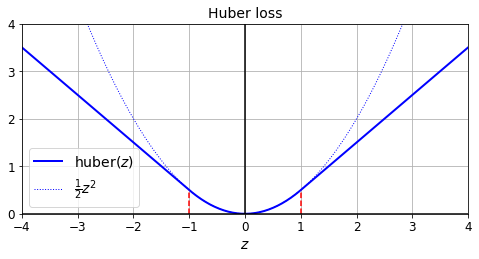

In [68]:
plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z**2 / 2, "b:", linewidth=1, label=r"$\frac{1}{2}z^2$")
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "r--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "r--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)

In [69]:
input_shape = X_train_scaled.shape[1:]

model = keras.models.Sequential()
model.add(keras.layers.Dense(30, activation='selu', kernel_initializer='lecun_normal', input_shape=input_shape))
model.add(keras.layers.Dense(1))

In [70]:
model.compile(loss=huber_fn, optimizer='nadam', metrics=['mse'])

In [71]:
model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/5
11610/11610 [==============================] - 2s 193us/sample - loss: 0.6280 - mse: 1.9608 - val_loss: 0.2920 - val_mse: 6.7034
Epoch 2/5
11610/11610 [==============================] - 1s 73us/sample - loss: 0.2203 - mse: 0.5511 - val_loss: 0.2324 - val_mse: 2.8720
Epoch 3/5
11610/11610 [==============================] - 1s 72us/sample - loss: 0.2051 - mse: 0.4864 - val_loss: 0.2161 - val_mse: 1.7310
Epoch 4/5
11610/11610 [==============================] - 1s 73us/sample - loss: 0.2001 - mse: 0.4691 - val_loss: 0.2067 - val_mse: 1.2240
Epoch 5/5
11610/11610 [==============================] - 1s 72us/sample - loss: 0.1971 - mse: 0.4633 - val_loss: 0.1971 - val_mse: 0.8611


In [72]:
model.evaluate(X_test_scaled, y_test, verbose=0)

[0.19155503654664802, 0.43879446]

## Saving/Loading Models with Custom Objects
- Saving a model containing a custom loss function works fine, as Keras saves the name of the function.
- Whenever you load it, you’ll need to provide a dictionary that maps the function name to the actual function.
    - More generally, when you load a model containing custom objects, you need to map the names to the objects.

In [73]:
# model.save('my_model_with_a_custom_loss.h5')

In [74]:
# model = keras.models.load_model('my_model_with_a_custom_loss.h5', 
#                                custom_objects={'huber_fn': huber_fn})

- Recall that when we defined `huber_fn` above, we set the threshold $\delta = 1$. 
- But what if you want a **different threshold**? 
- One solution is to create a function that creates a **configured loss function**.

In [75]:
def create_huber(threshold=1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        sqaured_loss = tf.square(error) / 2
        linear_loss = threshold * tf.abs(error) - threshold**2 / 2
        return tf.where(is_small_error, sqaured_loss, linear_loss)
    return huber_fn

In [76]:
model.compile(loss=create_huber(2), optimizer='nadam', metrics=['mae'])

In [77]:
model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/5
11610/11610 [==============================] - 2s 170us/sample - loss: 0.2177 - mae: 0.4834 - val_loss: 0.2269 - val_mae: 0.4918
Epoch 2/5
11610/11610 [==============================] - 1s 77us/sample - loss: 0.2150 - mae: 0.4804 - val_loss: 0.1980 - val_mae: 0.4592
Epoch 3/5
11610/11610 [==============================] - 1s 79us/sample - loss: 0.2113 - mae: 0.4759 - val_loss: 0.2009 - val_mae: 0.4583
Epoch 4/5
11610/11610 [==============================] - 1s 77us/sample - loss: 0.2087 - mae: 0.4720 - val_loss: 0.2174 - val_mae: 0.4639
Epoch 5/5
11610/11610 [==============================] - 1s 73us/sample - loss: 0.2086 - mae: 0.4710 - val_loss: 0.1932 - val_mae: 0.4516


In [78]:
model.evaluate(X_test_scaled, y_test, verbose=0)

[0.2037213422993357, 0.46696234]

- Unfortunately, when you save the model, the **threshold will not be saved**. 
- This means that you will have to **specify the threshold value** when **loading** the model. 
    - Note that the name to use is **"huber_fn"**, which is the name of the function you gave Keras.
    - Previously, you had `"huber_fn": huber_fn`, but now you use **`"huber_fn": create_huber(2.0)`** to specify the threshold value.

In [79]:
# model.save('my_model_with_a_custom_loss_threshold_2.h5')

In [80]:
# model = keras.models.load_model('my_model_with_a_custom_loss_threshold_2.h5', 
#                                custom_objects={"huber_fn": create_huber(2.0)})

- An easier solution is to create a **subclass** of the `keras.losses.Loss` class, and then implementing its `get_config()` method.
- Let’s walk through this code:
    - The constructor accepts `**kwargs` and passes them to the parent constructor, which handles standard hyperparameters: the name of the loss and the reduction algorithm to use to aggregate the individual instance losses. 
        - By default, it is `"sum_over_batch_size"`, which means that the loss will be the sum of the instance losses, weighted by the sample weights, if any, and divided by the batch size (not by the sum of weights, so this is not the weighted mean). 
        - Other possible values are `"sum"` and `"none"`.
    - The `call()` method takes the labels and predictions, computes all the instance losses, and returns them.
    - The `get_config()` method returns a dictionary mapping each hyperparameter name to its value. 
        - It first calls the parent class’s `get_config()` method, then adds the new hyperparameters to this dictionary (note that the convenient `{**x}` syntax was added in Python 3.5).

In [81]:
class HuberLoss(keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)
        
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [82]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(30, activation='selu', kernel_initializer='lecun_normal', input_shape=input_shape))
model.add(keras.layers.Dense(1))

In [83]:
model.compile(loss=HuberLoss(2.0), optimizer='nadam', metrics=['mae'])

In [84]:
model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/5
11610/11610 [==============================] - 2s 173us/sample - loss: 0.8622 - mae: 1.0016 - val_loss: 0.2834 - val_mae: 0.5250
Epoch 2/5
11610/11610 [==============================] - 1s 77us/sample - loss: 0.2380 - mae: 0.5063 - val_loss: 0.2468 - val_mae: 0.4931
Epoch 3/5
11610/11610 [==============================] - 1s 73us/sample - loss: 0.2298 - mae: 0.4985 - val_loss: 0.2151 - val_mae: 0.4784
Epoch 4/5
11610/11610 [==============================] - 1s 72us/sample - loss: 0.2245 - mae: 0.4928 - val_loss: 0.2391 - val_mae: 0.4878
Epoch 5/5
11610/11610 [==============================] - 1s 72us/sample - loss: 0.2227 - mae: 0.4896 - val_loss: 0.2141 - val_mae: 0.4720


In [85]:
model.evaluate(X_test_scaled, y_test, verbose=0)

[0.21640213044114814, 0.48220935]

In [86]:
model.loss.threshold

2.0

- When you save the model, the threshold will be saved along with it.
- When you load the model, you just need to map the class name to the class itself.

In [87]:
# model.save("my_model_with_a_custom_loss_class.h5")

In [88]:
# model = keras.models.load_model("my_model_with_a_custom_loss_class.h5", custom_objects={'HuberLoss': HuberLoss})

## Custom Activation Functions, Initializers, Regularizers, and Constraints
- Most Keras functionalities, such as losses, regularizers, constraints, initializers, metrics, activation functions, layers, and even full models, can be customized in very much the same way. 
- Most of the time, you will just need to write a simple function with the appropriate inputs and outputs. 
- Here is an example of a **custom activation function** (equivalent to `keras.activations.softplus()` or `tf.nn.softplus()`).

In [89]:
def my_softplus(z):
    return tf.math.log(tf.exp(z) + 1.0)

- A **custom Glorot initializer** (equivalent to `keras.initializers.glorot_normal()`)

In [90]:
def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)

- A **custom $l_1$ regularizer** (equivalent to `keras.regularizers.l1(0.01)`)

In [91]:
def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))

- A **custom constraint** that ensures **weights are all positive** (equivalent to `keras.constraints.nonneg()` or `tf.nn.relu()`)

In [92]:
def my_positive_weights(weights):
    return tf.where(weights < 0, tf.zeros_like(weights), weights)

- Now, let's build a model using all these custom functions.

In [93]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [94]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(30, activation='selu', kernel_initializer='lecun_normal', input_shape=input_shape))
model.add(keras.layers.Dense(1, activation=my_softplus,
                            kernel_regularizer=my_l1_regularizer,
                            kernel_initializer=my_glorot_initializer,
                            kernel_constraint=my_positive_weights))

In [95]:
model.compile(loss='mse', optimizer='nadam', metrics=['mae'])

In [96]:
model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/5
11610/11610 [==============================] - 2s 182us/sample - loss: 1.4956 - mae: 0.8797 - val_loss: 2.6089 - val_mae: 0.5787
Epoch 2/5
11610/11610 [==============================] - 1s 71us/sample - loss: 0.5896 - mae: 0.5271 - val_loss: 1.5789 - val_mae: 0.5117
Epoch 3/5
11610/11610 [==============================] - 1s 71us/sample - loss: 0.5256 - mae: 0.4966 - val_loss: 1.2509 - val_mae: 0.4936
Epoch 4/5
11610/11610 [==============================] - 1s 72us/sample - loss: 0.4993 - mae: 0.4873 - val_loss: 1.0026 - val_mae: 0.4834
Epoch 5/5
11610/11610 [==============================] - 1s 72us/sample - loss: 0.4908 - mae: 0.4839 - val_loss: 0.8833 - val_mae: 0.4763


In [97]:
# model.save("my_model_with_many_custom_parts.h5")

In [98]:
# model = keras.models.load_model("my_model_with_many_custom_parts.h5",
#                                custom_objects={"my_l1_regularizer": my_l1_regularizer,
#                                               "my_glorot_initializer": my_glorot_initializer,
#                                               "my_positive_weights": my_positive_weights,
#                                               "my_softplus": my_softplus})

- If a function has **hyperparameters that need to be saved** along with the model, then you will want to **subclass the appropriate class**, such as `keras.regularizers.Regularizer`, `keras.constraints.Constraint`, `keras.initializers.Initializer`, or `keras.layers.Layer` (for any layer, including activation functions).
- Here is a simple class for $l_1$ regularization that saves its factor hyperparameter.
    - Note that this time we do not need to call the parent constructor or the `get_config()` method, as they are not defined by the parent class.
    - Also, note that you must implement the `call()` method for **losses, layers (including activation functions), and models**, or the `__call__()` method for **regularizers, initializers, and constraints**.

In [99]:
class MyL1Regularizer(keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor = factor
        
    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(self.factor * weights))
    
    def get_config(self):
        return {"factor": self.factor}

In [100]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [101]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(30, activation='selu', kernel_initializer='lecun_normal', input_shape=input_shape))
model.add(keras.layers.Dense(1, activation=my_softplus,
                            kernel_regularizer=MyL1Regularizer(0.01), # here's the key point
                            kernel_initializer=my_glorot_initializer,
                            kernel_constraint=my_positive_weights))

In [102]:
model.compile(loss='mse', optimizer='nadam', metrics=['mae'])

In [103]:
model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/5
11610/11610 [==============================] - 2s 183us/sample - loss: 1.4956 - mae: 0.8797 - val_loss: 2.6089 - val_mae: 0.5787
Epoch 2/5
11610/11610 [==============================] - 1s 71us/sample - loss: 0.5896 - mae: 0.5271 - val_loss: 1.5789 - val_mae: 0.5117
Epoch 3/5
11610/11610 [==============================] - 1s 72us/sample - loss: 0.5256 - mae: 0.4966 - val_loss: 1.2509 - val_mae: 0.4936
Epoch 4/5
11610/11610 [==============================] - 1s 71us/sample - loss: 0.4993 - mae: 0.4873 - val_loss: 1.0026 - val_mae: 0.4834
Epoch 5/5
11610/11610 [==============================] - 1s 71us/sample - loss: 0.4908 - mae: 0.4839 - val_loss: 0.8833 - val_mae: 0.4763


In [104]:
model.evaluate(X_test_scaled, y_test, verbose=0)

[0.4838566177575163, 0.47744387]

In [105]:
# model.save("my_model_with_many_custom_parts.h5")

In [106]:
# model = keras.models.load_model("my_model_with_many_custom_parts.h5",
#                        custom_objects={"MyL1Regularizer": MyL1Regularizer, # factor = 0.01 is saved along the model
#                                        "my_positive_weights": my_positive_weights,
#                                        "my_glorot_initializer": my_glorot_initializer,
#                                        "my_softplus": my_softplus,})

## Custom Metrics
- **Metrics vs. Losses**
    - Losses and metrics are conceptually not the same thing.
    - **Losses** (e.g., cross entropy) are used by Gradient Descent to **train** a model, so they must be differentiable (at least where they are evaluated), and their gradients should not be 0 everywhere. 
        - Plus, it’s OK if they are not easily interpretable by humans. 
    - In contrast, **metrics** (e.g., accuracy) are used to **evaluate** a model: they must be more easily interpretable, and they can be non-differentiable or have 0 gradients everywhere.
- That said, in **most cases**, defining a **custom metric function** is **exactly the same** as defining a **custom loss function**. 
- In fact, we could even use the Huber loss function we created earlier as a metric.

In [107]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [108]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [109]:
model.compile(loss='mse', optimizer='nadam', metrics=[create_huber(2.0)])

In [110]:
model.fit(X_train_scaled, y_train, epochs=5)

Train on 11610 samples
Epoch 1/5
11610/11610 [==============================] - 2s 139us/sample - loss: 2.0666 - huber_fn: 0.9167
Epoch 2/5
11610/11610 [==============================] - 1s 56us/sample - loss: 0.5837 - huber_fn: 0.2699
Epoch 3/5
11610/11610 [==============================] - 1s 57us/sample - loss: 0.4944 - huber_fn: 0.2372
Epoch 4/5
11610/11610 [==============================] - 1s 57us/sample - loss: 0.4723 - huber_fn: 0.2298
Epoch 5/5
11610/11610 [==============================] - 1s 56us/sample - loss: 0.4629 - huber_fn: 0.2260


- Warning: if you use the **same function** as the loss and a metric, you may be surprised to see **different results**. 
     - This is generally just due to **floating point precision errors**: even though the mathematical equations are equivalent, the operations are not run in the same order, which can lead to small differences. 
     - Moreover, when using **sample weights**, there's more than just precision errors.
        - The **sample weights** is an array of numbers that specify how much weight each sample in a batch should have in computing the total loss.
        - The **loss** since the start of the epoch is the **mean of all batch losses** seen so far. 
            - Each batch loss is the sum of the weighted instance losses divided by the batch size (not the sum of weights, so the batch loss is not the weighted mean of the losses).
        - The **metric** since the start of the epoch is equal to the sum of weighted instance losses divided by sum of all weights seen so far. 
            - In other words, it is the **weighted mean of all the instance losses**. Not the same thing.
        - If you do the math, you will find that **loss = metric $\times$ mean of sample weights ($+$ some floating point precision error)**.

In [111]:
model.compile(loss=create_huber(2.0), optimizer='nadam', metrics=[create_huber(2.0)])

In [112]:
sample_weight=np.random.rand(len(y_train))
history = model.fit(X_train_scaled, y_train, epochs=5, sample_weight=sample_weight)

Train on 11610 samples
Epoch 1/5
11610/11610 [==============================] - 2s 178us/sample - loss: 0.1103 - huber_fn: 0.2224
Epoch 2/5
11610/11610 [==============================] - 1s 66us/sample - loss: 0.1084 - huber_fn: 0.2197
Epoch 3/5
11610/11610 [==============================] - 1s 65us/sample - loss: 0.1068 - huber_fn: 0.2164
Epoch 4/5
11610/11610 [==============================] - 1s 66us/sample - loss: 0.1056 - huber_fn: 0.2138
Epoch 5/5
11610/11610 [==============================] - 1s 65us/sample - loss: 0.1046 - huber_fn: 0.2129


In [113]:
history.history['loss'][0], history.history['huber_fn'][0] * sample_weight.mean()

(0.11026406210368302, 0.11036158435038575)

## Streaming Metrics
- When training models, it is somethings problematic to compute the model's precision by taking the mean of the precision of each batch (see example on page 389).
- What we need is an object that can **keep track of the number of true positives and the number of false positives** and that can compute their ratio when requested. 
    - This is precisely what the **`keras.metrics.Precision`** class does.

In [114]:
precision = keras.metrics.Precision()

In [115]:
# After the First batch
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])

<tf.Tensor: id=57969, shape=(), dtype=float32, numpy=0.8>

In [116]:
# After the Second batch
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

<tf.Tensor: id=58016, shape=(), dtype=float32, numpy=0.5>

- Note that for the first batch, true positive/positive predictions is $4/5 = 0.8$.
- For the second batch, true positive/positive predictions is $0/3 = 0$.
- Now, if take the mean of them, the overall precision is $(0.8 + 0) / 2 = 0.4$.
    - However, if you think about it carefully, the true overall precision is $(4+0) / (5+3) = 0.5$.
    - This is called a **streaming metric** (or stateful metric), as it is gradually updated, batch after batch.

- As we can see, **`keras.metrics.Precision`** is a streaming metric.
    - At any point, we can call the `result()` method to get the **current value** of the metric.
    - We can also **look at its variables** (tracking the number of true and false positives) by using the `variables` attribute.
    - We can reset these variables using the `reset_states()` method.

In [117]:
precision.result()

<tf.Tensor: id=58025, shape=(), dtype=float32, numpy=0.5>

In [118]:
precision.variables

[<tf.Variable 'true_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>,
 <tf.Variable 'false_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>]

In [119]:
precision.reset_states()

- If you need to create such a streaming metric, create a **subclass** of the **`keras.metrics.Metric` class**. 
- Here is a simple example that keeps track of the total Huber loss and the number of instances seen so far.
    - The constructor uses the `add_weight()` method to **create the variables needed** to keep track of the metric’s state over multiple batches—in this case, the sum of all Huber losses (total) and the number of instances seen so far (count). 
        - You could just create variables manually if you preferred. 
            - Keras tracks any `tf.Variable` that is set as an attribute (and more generally, any “trackable” object, such as layers or models).
    - The `update_state()` method is called when you **use an instance of this class as a function** (as we did with the Precision object). 
        - It **updates the variables**, given the labels and predictions for one batch (and sample weights, but in this case we ignore them).
    - The `result()` method **computes and returns the final result**, in this case the mean Huber metric over all instances. 
        - When you use the metric as a function, the `update_state()` method gets called first, then the `result()` method is called, and its output is returned.
    - We also implement the `get_config()` method to ensure the **threshold gets saved** along with the model.
    - The default implementation of the `reset_states()` method resets all variables to 0.0 (but you can override it if needed).

In [120]:
class HuberMetric(keras.metrics.Metric):
    def __init__(self, threshold=1.0, **kwargs):
        super().__init__(**kwargs) # handles base args (e.g., dtype)
        self.threshold = threshold
        #self.huber_fn = create_huber(threshold) # TODO: investigate why this fails
        self.total = self.add_weight("total", initializer="zeros")
        self.count = self.add_weight("count", initializer="zeros")
    def huber_fn(self, y_true, y_pred): # workaround
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(metric))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))
    def result(self):
        return self.total / self.count
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [121]:
m = HuberMetric(2.0)

m(tf.constant(2.0), tf.constant(10.0))

<tf.Tensor: id=58072, shape=(), dtype=float32, numpy=14.0>

In [122]:
m(tf.constant([0., 5.]), tf.constant([1., 9.25]))

m.result()

<tf.Tensor: id=58103, shape=(), dtype=float32, numpy=7.0>

In [123]:
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=21.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=3.0>]

In [124]:
m.reset_states()

In [125]:
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=0.0>]

- Now, let's check that `HuberMetric` class works well.

In [126]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [127]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='selu', kernel_initializer='lecun_normal', input_shape=input_shape),
    keras.layers.Dense(1)
])

In [128]:
model.compile(loss=create_huber(2.0), optimizer='nadam', metrics=[HuberMetric(2.0)])

In [129]:
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 2s 144us/sample - loss: 0.8702 - huber_metric: 0.8702
Epoch 2/2
11610/11610 [==============================] - 1s 59us/sample - loss: 0.2603 - huber_metric: 0.2603


In [130]:
# model.save("my_model_with_a_custom_metric.h5")

# model = keras.models.load_model("my_model_with_a_custom_metric.h5",
#                                custom_objects={"huber_fn": create_huber(2.0),
#                                               "HuberMetric": HuberMetric})

In [131]:
model.metrics[-1].threshold

2.0

- More simply, we could have created the class like the following.
    - It handles shapes better and supports sample weights.

In [132]:
class HuberMetric(keras.metrics.Mean):
    def __init__(self, threshold=1.0, name='HuberMetric', dtype=None):
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        super().__init__(name=name, dtype=dtype)
    
    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        super(HuberMetric, self).update_state(metric, sample_weight)
    
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [133]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [134]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [135]:
model.compile(loss=keras.losses.Huber(2.0), optimizer='nadam', weighted_metrics=[HuberMetric(2.0)])

In [136]:
sample_weight = np.random.rand(len(y_train))

In [137]:
history = model.fit(X_train_scaled, y_train, epochs=5, sample_weight=sample_weight)

Train on 11610 samples
Epoch 1/5
11610/11610 [==============================] - 2s 134us/sample - loss: 0.4336 - HuberMetric: 0.8739
Epoch 2/5
11610/11610 [==============================] - 1s 66us/sample - loss: 0.1298 - HuberMetric: 0.2615
Epoch 3/5
11610/11610 [==============================] - 1s 69us/sample - loss: 0.1176 - HuberMetric: 0.2371
Epoch 4/5
11610/11610 [==============================] - 1s 65us/sample - loss: 0.1137 - HuberMetric: 0.2290
Epoch 5/5
11610/11610 [==============================] - 1s 65us/sample - loss: 0.1118 - HuberMetric: 0.2253


In [138]:
history.history['loss'][0], history.history['HuberMetric'][0] * sample_weight.mean()

(0.4336462583293389, 0.43364633566224664)

In [139]:
# model.save("my_model_with_a_custom_metric_v2.h5")

# model = keras.models.load_model("my_model_with_a_custom_metric_v2.h5",
#                                custom_objects={'HuberMetric': HuberMetric})

In [140]:
model.metrics[-1].threshold

2.0

## Custom Layers
- If you want to create **a custom layer without any weights**, the simplest option is to write a function and wrap it in a `keras.layers.Lambda layer`.
- Let's create an exponential layer at the output of a regression model.

In [141]:
exponential_layer = keras.layers.Lambda(lambda x: tf.exp(x))

In [142]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [143]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(30, activation='relu', input_shape=input_shape))
model.add(keras.layers.Dense(1))
model.add(exponential_layer)

In [144]:
model.compile(loss='mse', optimizer='nadam')

In [145]:
model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/5
11610/11610 [==============================] - 2s 139us/sample - loss: nan - val_loss: nan
Epoch 2/5
11610/11610 [==============================] - 1s 62us/sample - loss: nan - val_loss: nan
Epoch 3/5
11610/11610 [==============================] - 1s 61us/sample - loss: nan - val_loss: nan
Epoch 4/5
11610/11610 [==============================] - 1s 61us/sample - loss: nan - val_loss: nan
Epoch 5/5
11610/11610 [==============================] - 1s 61us/sample - loss: nan - val_loss: nan


In [146]:
model.evaluate(X_test_scaled, y_test, verbose=0)

nan

- To build a custom stateful layer (i.e., a layer with weights), you need to create a **subclass** of the `keras.layers.Layer` class. 
- For example, the following class implements a simplified version of the **Dense layer**.
    - The **constructor** takes all the hyperparameters as arguments (in this example, units and activation), and importantly it also takes a `**kwargs` argument. 
        - It calls the parent constructor, passing it the `kwargs`: this takes care of standard arguments such as `input_shape`, `trainable`, and `name`. 
        - Then it saves the hyperparameters as attributes, converting the activation argument to the appropriate activation function using the `keras.activations.get()` function (it accepts functions, standard strings like "relu" or "selu", or simply None).
    - The **`build()`** method’s role is to create the layer’s variables by calling the `add_weight()` method for each weight. 
        - The `build()` method is called the first time the layer is used. 
            - At that point, Keras will know the shape of this layer’s inputs, and it will pass it to the `build()` method, which is often necessary to create some of the weights. 
            - For example, we need to know the number of neurons in the previous layer in order to create the connection weights matrix (i.e., the "kernel"): this corresponds to the size of the last dimension of the inputs.
        - At the end of the `build()` method (and only at the end), you must call the parent’s `build() method`: this tells Keras that the layer is built (it just sets `self.built=True`).
    - The **`call()`** method performs the desired operations. 
        - In this case, we compute the matrix multiplication of the inputs $X$ and the layer’s kernel, we add the bias vector, and we apply the activation function to the result, and this gives us the output of the layer.
    - The **`compute_output_shape()`** method simply returns the shape of this layer’s outputs. 
        - In this case, it is the same shape as the inputs, except the last dimension is replaced with the number of neurons in the layer. 
        - Note that in `tf.keras`, shapes are instances of the `tf.TensorShape` class, which you can convert to Python lists using `as_list()`.
    - The **`get_config()`** method is just like in the previous custom classes. 
        - Note that we save the activation function’s full configuration by calling `keras.activations.serialize()`.

In [147]:
class MyDense(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation)
        
    def build(self, batch_input_shape):
        self.kernel = self.add_weight(
            name='kernel',
            shape=[batch_input_shape[-1], self.units],
            initializer="glorot_normal")
        
        self.bias = self.add_weight(
            name='bias',
            shape=[self.units],
            initializer='zeros')
        
        super().build(batch_input_shape) # must be at the end
        
    def call(self, X):
        return self.activation(X @ self.kernel + self.bias)
    
    def compute_output_shape(self,  batch_input_shape):
        return tf.TensorShape(batch_input_shape.as_list()[:-1] + [self.units])
    
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "units": self.units, "activation": keras.activations.serialize(self.activation)}

In [148]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [149]:
model = keras.models.Sequential([
    MyDense(30, activation="relu", input_shape=input_shape),
    MyDense(1)
])

In [150]:
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test, verbose=0)

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 2s 147us/sample - loss: 2.1345 - val_loss: 1.0399
Epoch 2/2
11610/11610 [==============================] - 1s 64us/sample - loss: 0.6441 - val_loss: 0.5284


0.5410040904385175

In [151]:
# model.save("my_model_with_a_custom_layer.h5")

In [152]:
# model = keras.models.load_model("my_model_with_a_custom_layer.h5",
#                                custom_objects={'MyDense': MyDense})

- To create **a layer with multiple inputs** (e.g. concatenate layers), the argument to the `call()` method should be a tuple containing all the inputs, and similarly the argument to the `compute_output_shape()` method should be a tuple containing each input’s batch shape. 
- To create **a layer with multiple outputs**, the `call()` method should return the list of outputs, and `compute_output_shape()` should return the list of batch output shapes (one per output). 
- For example, the following toy layer takes two inputs and returns three outputs.

In [153]:
class MyMultiLayer(keras.layers.Layer):
    def call(self, X):
        X1, X2 = X
        return [X1 + X2, X1 * X2, X1/X2]
    
    def compute_output_shape(self, batch_input_shape):
        batch_input_shape1, batch_input_shape2 = batch_input_shape
        return [batch_input_shape1, batch_input_shape1, batch_input_shape2]

- If your layer needs to have a **different behavior during training and during testing** (e.g. `Dropout` or `BatchNormalization` layers), then you must add a **`training` argument** to the `call()` method and use this argument to decide what to do. 
- For example, let’s create a layer that adds Gaussian noise during training (for regularization) but does nothing during testing (Keras has a layer that does the same thing, `keras.layers.GaussianNoise`).

In [154]:
class AddGaussianNoise(keras.layers.Layer):
    def __init__(self, stddev, **kwargs):
        super().__init__(**kwargs)
        self.stddev = stddev

    def call(self, X, training=None):
        if training:
            noise = tf.random.normal(tf.shape(X), stddev=self.stddev)
            return X + noise
        else:
            return X

    def compute_output_shape(self, batch_input_shape):
        return batch_input_shape

In [155]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [156]:
model = keras.models.Sequential([
    MyDense(30, activation="relu", input_shape=input_shape),
    AddGaussianNoise(0.1),
    MyDense(1)
])

In [157]:
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test, verbose=0)

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 2s 169us/sample - loss: 2.1537 - val_loss: 1.0652
Epoch 2/2
11610/11610 [==============================] - 1s 68us/sample - loss: 0.6635 - val_loss: 0.5278


0.544473403830861

## Cutom Models
- Creating custom models is straightforward: subclass the `keras.Model` class, create layers and variables in the constructor, and implement the `call()` method to do whatever you want the model to do.
- For example, suppose we want to build a model with **two dense layers** and **two residual blocks** in between. 
    - The inputs go through a first dense layer, then through a residual block composed of two dense layers and an addition operation (as we will see in Chapter 14, a residual block adds its inputs to its outputs), then through this same residual block three more times, then through a second residual block, and the final result goes through a dense output layer.
- To implement this model, it is best to first create a `ResidualBlock` layer.
    - This layer is a bit special since it contains other layers. 
    - This is handled transparently by Keras: it automatically detects that the `hidden` attribute contains trackable objects (layers in this case), so their variables are automatically added to this layer’s list of variables.

In [158]:
X_new_scaled = X_test_scaled

In [159]:
class ResidualBlock(keras.layers.Layer):
    def __init__(self, n_layers, n_neurons, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(n_neurons, activation='elu', kernel_initializer='he_normal')
                       for sample in range(n_layers)]
        
    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        return inputs + Z

- Next, let’s use the Subclassing API to define the model itself.
    - We create the layers in the constructor and use them in the `call() method`.

In [160]:
class ResidualRegressor(keras.models.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        
        self.hidden1 = keras.layers.Dense(30, activation='elu', kernel_initializer='he_normal')
        self.block1 = ResidualBlock(2, 30)
        self.block2 = ResidualBlock(2, 30)
        self.out = keras.layers.Dense(output_dim)
        
    def call(self, inputs):
        Z = self.hidden1(inputs)
        
        for sample in range(1+3):
            Z = self.block1(Z)
        
        Z = self.block2(Z)
        return self.out(Z)

- This model can then be used like any other model (compile it, fit it, evaluate it, and use it to make predictions). 
- If you also want to be able to save the model using the `save()` method and load it using the `keras.models.load_model()` function, you must implement the `get_config()` method (as we did earlier) in both the `ResidualBlock` class and the `ResidualRegressor` class. 
    - Alternatively, you can save and load the weights using the `save_weights()` and `load_weights()` methods.

In [161]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [162]:
model = ResidualRegressor(1)

In [163]:
model.compile(loss='mse', optimizer='nadam')

In [164]:
history = model.fit(X_train_scaled, y_train, epochs=5)

Train on 11610 samples
Epoch 1/5
11610/11610 [==============================] - 3s 290us/sample - loss: 7.1528
Epoch 2/5
11610/11610 [==============================] - 1s 114us/sample - loss: 1.5937
Epoch 3/5
11610/11610 [==============================] - 1s 114us/sample - loss: 1.5605
Epoch 4/5
11610/11610 [==============================] - 1s 114us/sample - loss: 0.5430
Epoch 5/5
11610/11610 [==============================] - 1s 113us/sample - loss: 0.5145


In [165]:
model.evaluate(X_test_scaled, y_test, verbose=0)

0.6590560416380564

In [166]:
model.predict(X_new_scaled)

array([[0.57590234],
       [1.7319051 ],
       [3.8962584 ],
       ...,
       [1.3080589 ],
       [3.1700807 ],
       [4.284896  ]], dtype=float32)

- We can also define the model using the `Sequential` API instead.

In [167]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [168]:
block1 = ResidualBlock(2, 30)
block2 = ResidualBlock(2, 30)

model = keras.models.Sequential()

model.add(keras.layers.Dense(30, activation='elu', kernel_initializer='he_normal'))

model.add(block1)
model.add(block1)
model.add(block1)
model.add(block1)

model.add(block2)

model.add(keras.layers.Dense(1))

In [169]:
model.compile(loss='mse', optimizer='nadam')

In [170]:
model.fit(X_train_scaled, y_train, epochs=5)

Train on 11610 samples
Epoch 1/5
11610/11610 [==============================] - 3s 255us/sample - loss: 0.7518
Epoch 2/5
11610/11610 [==============================] - 1s 80us/sample - loss: 0.4943
Epoch 3/5
11610/11610 [==============================] - 1s 80us/sample - loss: 0.5469
Epoch 4/5
11610/11610 [==============================] - 1s 80us/sample - loss: 0.5552
Epoch 5/5
11610/11610 [==============================] - 1s 81us/sample - loss: 0.4207


In [171]:
model.evaluate(X_test_scaled, y_test, verbose=0)

0.561464685848517

In [172]:
model.predict(X_new_scaled)

array([[0.7428521],
       [1.7315296],
       [4.2834544],
       ...,
       [1.5823435],
       [2.5581138],
       [4.389075 ]], dtype=float32)

## Losses and Metrics based on Model Internals
- The custom losses and metrics we defined earlier were all based on the labels and the predictions (and optionally sample weights). 
- There will be times when you want to **define losses based on other parts of your model**, such as the weights or activations of its hidden layers. 
    - This may be useful for regularization purposes or to monitor some internal aspect of your model.
- To define a custom loss based on model internals, **compute it** based on any part of the model you want, then pass the result to the **`add_loss()` method**.
- For example, let’s build a custom regression MLP model composed of a stack of **five hidden layers** plus **an output layer**. 
    - This custom model will also have **an auxiliary output** on top of the upper hidden layer. 
    - The loss associated to this auxiliary output will be called the **reconstruction loss** (see Chapter 17): it is the mean squared difference between the reconstruction and the inputs. 
    - By adding this reconstruction loss to the main loss, we will **encourage the model to preserve as much information as possible through the hidden layers**—even information that is not directly useful for the regression task itself. 
    - In practice, this loss sometimes improves generalization (it is a regularization loss). 
    - Here is the code for this custom model with a custom reconstruction loss.
        - The **constructor** creates the DNN with five dense hidden layers and one dense output layer.
        - The **`build()` method** creates an **extra dense layer** which will be used to reconstruct the inputs of the model. 
            - It must be created here because its number of units must be equal to the number of inputs, and this number is unknown before the `build()` method is called.
        - The **`call()` method** processes the inputs through all five hidden layers, then passes the result through the reconstruction layer, which produces the reconstruction.
            - Then the `call()` method computes the **reconstruction loss** (the mean squared difference between the reconstruction and the inputs), and adds it to the model’s list of losses using the `add_loss()` method. 
                - Notice that we scale down the reconstruction loss by multiplying it by 0.05 (this is a hyperparameter you can tune). 
                - This ensures that the reconstruction loss does not dominate the main loss.
        - Finally, the **`call()` method** passes the output of the hidden layers to the output layer and returns its output.

In [173]:
class ReconstructingRegressor(keras.models.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(30, activation='selu', kernel_initializer='lecun_normal')
                      for sample in range(5)]
        self.out = keras.layers.Dense(output_dim)
        
    def build(self, batch_input_shape):
        n_inputs = batch_input_shape[-1]
        self.reconstruct = keras.layers.Dense(n_inputs)
        super().build(batch_input_shape)
        
    def call(self, inputs, training=None):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        reconstruction = self.reconstruct(Z)
        recon_loss = tf.reduce_mean(tf.square(reconstruction - inputs))
        self.add_loss(0.05 * recon_loss)
        return self.out(Z)

In [174]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [175]:
model = ReconstructingRegressor(1)

In [176]:
model.compile(loss='mse', optimizer='nadam')

In [177]:
model.fit(X_train_scaled, y_train, epochs=5)

Train on 11610 samples
Epoch 1/5
11610/11610 [==============================] - 4s 317us/sample - loss: 0.7969
Epoch 2/5
11610/11610 [==============================] - 1s 118us/sample - loss: 0.4136
Epoch 3/5
11610/11610 [==============================] - 1s 116us/sample - loss: 0.3816
Epoch 4/5
11610/11610 [==============================] - 1s 127us/sample - loss: 0.3680
Epoch 5/5
11610/11610 [==============================] - 1s 128us/sample - loss: 0.3549


## Computing Gradients with Autodiff
- Given that $f(w_{1}, w_{2}) = 3 \times w_{1}^{2} + 2 \times w_{1} \times w_{2}$, then we know that the partial derivatives are:
    - $f_{w_{1}}' = 6w_{1} + 2w_{2}$
    - $f_{w_{2}}' = 2w_{1}$
- Thus, at point $(5, 3)$, we have the gradient vector $(36, 10)$.
- Using Autodiff, we can calculate the gradient vector through approximation.

In [178]:
def f(w1, w2):
    return 3 * w1 ** 2 + 2 * w1 * w2

In [179]:
w1 = tf.Variable(5.)
w2 = tf.Variable(3.)

with tf.GradientTape() as tape:
    z = f(w1, w2)
    
gradients = tape.gradient(z, [w1, w2])
gradients

[<tf.Tensor: id=104472, shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: id=104464, shape=(), dtype=float32, numpy=10.0>]

- The tape is automatically erased immediately after you call its `gradient()` method.
    - So that `GradientTape.gradient` can only be called once on non-persistent tapes.

In [180]:
# tape.gradient(z, w1) # Error! As we just called it above.

- If you need to call `gradient()` more than once, you must make the tape persistent and delete it each time you are done with it to free resources.

In [181]:
with tf.GradientTape(persistent=True) as tape:
    z = f(w1, w2)
    
dz_dw1 = tape.gradient(z, w1)
dz_dw2 = tape.gradient(z, w2)

del tape

dz_dw1, dz_dw2

(<tf.Tensor: id=104496, shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: id=104501, shape=(), dtype=float32, numpy=10.0>)

- By default, the tape will only track operations involving variables, so if you try to compute the gradient of $z$ with regard to anything other than a variable (e.g. `tf.constant`), the result will be `None`.

In [182]:
c1 = tf.constant(5.)
c2 = tf.constant(3.)

with tf.GradientTape() as tape:
    z = f(c1, c2)

gradient = tape.gradient(z, [c1, c2])
gradient

[None, None]

- However, you can force the tape to watch any tensors you like, to record every operation that involves them. 
- You can then compute gradients with regard to these tensors, as if they were variables.

In [183]:
c1 = tf.constant(5.)
c2 = tf.constant(3.)

with tf.GradientTape() as tape:
    tape.watch(c1)
    tape.watch(c2)
    z = f(c1, c2)

gradient = tape.gradient(z, [c1, c2])
gradient

[<tf.Tensor: id=104541, shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: id=104533, shape=(), dtype=float32, numpy=10.0>]

- If you ever need to get the individual gradients of a vector containing multiple elements, you must call the tape’s `jacobian()` method.
    - It will perform reverse-mode autodiff once for each element in the vector (all in parallel by default). 
- It is then even possible to compute second-order partial derivatives (the Hessians, i.e., the partial derivatives of the partial derivatives).

In [184]:
with tf.GradientTape(persistent=True) as hessian_tape:
    with tf.GradientTape() as jacobian_tape:
        z = f(w1, w2)
    jacobians = jacobian_tape.gradient(z, [w1, w2])
hessians = [hessian_tape.gradient(jacobian, [w1, w2])
           for jacobian in jacobians]
del hessian_tape

In [185]:
jacobians

[<tf.Tensor: id=104565, shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: id=104557, shape=(), dtype=float32, numpy=10.0>]

In [186]:
hessians

[[<tf.Tensor: id=104574, shape=(), dtype=float32, numpy=6.0>,
  <tf.Tensor: id=104576, shape=(), dtype=float32, numpy=2.0>],
 [<tf.Tensor: id=104581, shape=(), dtype=float32, numpy=2.0>, None]]

- In some cases you may want to stop gradients from backpropagating through some part of your neural network. 
- To do this, you must use the `tf.stop_gradient()` function.
    - The function returns its inputs during the forward pass (like `tf.identity()`), but it does not let gradients through during backpropagation (it acts like a constant).

In [187]:
def f(w1, w2):
    return 3 * w1 ** 2 + tf.stop_gradient(2 * w1 * w2)

with tf.GradientTape() as tape:
    z = f(w1, w2)

tape.gradient(z, [w1, w2])

[<tf.Tensor: id=104601, shape=(), dtype=float32, numpy=30.0>, None]

- Finally, you may occasionally run into some numerical issues when computing gradients.
    - For example, if you compute the gradients of the `my_softplus()` function (defined previously) for large inputs, the result will be NaN.

In [188]:
def my_softplus(x):
    return tf.math.log(tf.exp(x) + 1.0)

In [189]:
x = tf.Variable(100.)

with tf.GradientTape() as tape:
    z = my_softplus(x)
    
tape.gradient(z, [x])

[<tf.Tensor: id=104617, shape=(), dtype=float32, numpy=nan>]

- Fortunately, we can analytically find that the derivative of the softplus function is just $1 / (1 + 1 / exp(x))$, which is numerically stable. 
- Next, we can tell TensorFlow to use this stable function when computing the gradients of the `my_softplus()` function by decorating it with `@tf.custom_gradient` and making it return both its normal output and the function that computes the derivatives.

In [190]:
@tf.custom_gradient

def my_better_softplus(x):
    exp = tf.exp(x)
    
    def my_softplus_gradients(grad):
        return grad/(1+1/exp)
    
    return tf.math.log(exp + 1), my_softplus_gradients

In [191]:
x = tf.Variable(1000.)

with tf.GradientTape() as tape:
    z = my_better_softplus(x)
    
tape.gradient(z, [x])

[<tf.Tensor: id=104637, shape=(), dtype=float32, numpy=1.0>]

## Custom Training Loops
- First, let's build a model.

In [192]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [193]:
l2_reg = keras.regularizers.l2(0.05)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation='elu', kernel_initializer='he_normal', kernel_regularizer=l2_reg),
    keras.layers.Dense(1, kernel_regularizer=l2_reg)
])

- Next, let’s create a tiny function that will randomly sample a batch of instances from the training set.

In [194]:
def random_batch(X, y, batch_size=32):
    idx = np.random.randint(len(X), size=batch_size)
    return X[idx], y[idx]

- Let’s also define a function that will display the training status, including the number of steps, the total number of steps, the mean loss since the start of the epoch (i.e., we will use the `Mean` metric to compute it), and other metrics.

In [195]:
def print_status_bar(iteration, total, loss, metrics=None):
    metrics = "-".join(["{}: {:.4f}".format(m.name, m.result()) for m in [loss] + (metrics or [])])
    end = "" if iteration < total else "\n"
    print("\r{}/{} - ".format(iteration, total) + metrics, end=end)

- Before customizing the training loop, we need to define some hyperparameters and choose the optimizer, the loss function, and the metrics.

In [196]:
n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size
optimizer = keras.optimizers.Nadam(lr=0.01)
loss_fn = keras.losses.mean_squared_error
mean_loss = keras.metrics.Mean()
metrics = [keras.metrics.MeanAbsoluteError()]

- Now, we can design our training loop.
    - We create two nested loops: one for the epochs, the other for the batches within an epoch.
    - Then we sample a random batch from the training set.
    - Inside the `tf.GradientTape()` block, we make a prediction for one batch (using the model as a function), and we compute the loss: it is equal to the main loss plus the other losses (in this model, there is one regularization loss per layer).
        - Since the `mean_squared_error()` function returns one loss per instance, we compute the mean over the batch using `tf.reduce_mean()` (if you wanted to apply different weights to each instance, this is where you would do it). 
        - The regularization losses are already reduced to a single scalar each, so we just need to sum them (using `tf.add_n()`, which sums multiple tensors of the same shape and data type).
    - Next, we ask the tape to compute the gradient of the loss with regard to each trainable variable (not all variables!), and we apply them to the optimizer to perform a Gradient Descent step.
    - Then we update the mean loss and the metrics (over the current epoch), and we display the status bar.
    - At the end of each epoch, we display the status bar again to make it look complete and to print a line feed, and we reset the states of the mean loss and the metrics.

In [197]:
for epoch in range(1, n_epochs+1):
    print("Epoch {}/{}".format(epoch, n_epochs))
    
    for step in range(1, n_steps+1):
        X_batch, y_batch = random_batch(X_train_scaled, y_train)
        
        with tf.GradientTape() as tape:
            y_pred = model(X_batch)
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss], model.losses)   # Sum up main loss and regularization loss
        
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        
        for variable in model.variables:
            if variable.constraint is not None:
                variable.assign(variable.constraint(variable))
        
        mean_loss(loss)   # Update loss
        
        for metric in metrics:
            metric(y_batch, y_pred)   # Update metrics
        
        print_status_bar(step*batch_size, len(y_train), mean_loss, metrics)
    
    print_status_bar(len(y_train), len(y_train), mean_loss, metrics)
    for metric in [mean_loss] + metrics:
        metric.reset_states()

Epoch 1/5

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

11610/11610 - mean: 0.6909-mean_absolute_error: 0.5612
Epoch 2/5
11610/11610 - mean: 0.5654-mean_absolute_error: 0.4871
Epoch 3/5
11610/11610 - mean: 0.3987-mean_absolute_error: 0.4542
Epoch 4/5
11610/11610 - mean: 0.5105-mean_absolute_error: 0.4634
Epoch 5/5
11610/11610 - mean: 0.4815-mean_absolute_error: 0.4562


# TensorFlow Functions
- TF Function will usually run much faster than the original Python function, especially if it performs complex computations. 
- Most of the time you will not really need to know more than that: when you want to boost a Python function, just transform it into a TF Function.
- We can transform a python function into a TensorFlow function using `tf.function`.

In [198]:
def cube(x):
    return x ** 3

In [199]:
cube(2)

8

In [200]:
cube(tf.constant(2.0))

<tf.Tensor: id=515750, shape=(), dtype=float32, numpy=8.0>

In [201]:
tf_cube = tf.function(cube)
tf_cube

In [202]:
tf_cube(2)

<tf.Tensor: id=515756, shape=(), dtype=int32, numpy=8>

In [203]:
tf_cube(tf.constant(2.0))

<tf.Tensor: id=515764, shape=(), dtype=float32, numpy=8.0>

- Alternatively, we could have used `tf.function` as a decorator which is actually more common.

In [204]:
@tf.function
def tf_cube(x):
    return x ** 3

In [205]:
tf_cube(2)

<tf.Tensor: id=515770, shape=(), dtype=int32, numpy=8>

In [206]:
tf_cube(tf.constant(2.0))

<tf.Tensor: id=515778, shape=(), dtype=float32, numpy=8.0>

- The original Python function is still available via the TF Function’s `python_function` attribute.

In [207]:
tf_cube.python_function(2.0)

8.0

- when you write a custom loss function, a custom metric, a custom layer, or any other custom function and you use it in a Keras model (as we did throughout this chapter), Keras automatically converts your function into a TF Function—no need to use `tf.function()`.
- By default, a TF Function generates a new graph for every unique set of input shapes and data types and caches it for subsequent calls. 
    - For example, if you call `tf_cube(tf.constant(10))`, a graph will be generated for int32 tensors of shape `[]`.
    - Then if you call `tf_cube(tf.constant(20))`, the same graph will be reused. 
    - But if you then call `tf_cube(tf.constant([10, 20]))`, a new graph will be generated for int32 tensors of shape `[2]`.
    - This is how TF Functions handle polymorphism (i.e., varying argument types and shapes). 
- However, this is only true for tensor arguments: if you pass numerical Python values to a TF Function, a new graph will be generated for every distinct value.
    - For example, calling `tf_cube(10)` and `tf_cube(20)` will generate two graphs.

In [208]:
@tf.function
def tf_cube(x):
    print("print: ", x)
    return x**3

In [209]:
result = tf_cube(tf.constant(2.0))
result

print:  Tensor("x:0", shape=(), dtype=float32)


<tf.Tensor: id=515787, shape=(), dtype=float32, numpy=8.0>

In [210]:
result = tf_cube(2)
result = tf_cube(3)
result = tf_cube(tf.constant([[1., 2. ]])) # New shape
result = tf_cube(tf.constant([[3., 4.], [5., 6.]])) # New shape

print:  2
print:  3
print:  Tensor("x:0", shape=(1, 2), dtype=float32)
print:  Tensor("x:0", shape=(2, 2), dtype=float32)


- For more information about TensorFlow Functions, visit: https://github.com/ageron/handson-ml2/blob/master/12_custom_models_and_training_with_tensorflow.ipynb

# Exercises
## 12. Implement a custom layer that performs Layer Normalization
### a.
- The `build` method should define two trainable weights $\alpha$ and $\beta$, both of `input_shape=[-1:]` and data type `tf.float32`.
- The $\alpha$ weights should be initialized with 1s, and The $\beta$ weights should be initialized with 0s.

### b.
- The `call()` method should compute the mean $\mu$ and standard deviation $\sigma$ of each instance's features. 
    - For this, you can use `tf.nn.moments(inputs, axes=-1, keepdims=True)`, which returns the mean $\mu$ and the variance $\sigma^{2}$ of all instances (compute the square root of the variance to get the standard deviation). 
- Then the function should compute and return $\alpha \bigotimes (X - \mu)/(\sigma + \epsilon) + \beta$, where $\bigotimes$ represents itemwise multiplication and $\epsilon$ is a smoothing term (small constant to avoid division by zero, e.g., 0.001).

In [211]:
class LayerNormalization(keras.layers.Layer):
    def __init__(self, eps=0.001, **kwargs):
        super().__init__(**kwargs)
        self.eps = eps
        
    def build(self, batch_input_shape):
        self.alpha = self.add_weight(name='alpha', shape=batch_input_shape[-1:], initializer='ones')
        self.beta = self.add_weight(name='beta', shape=batch_input_shape[-1:], initializer='zeros')
        super().build(batch_input_shape) # Must be at the end
        
    def call(self, X):
        mean, variance = tf.nn.moments(X, axes=-1, keepdims=True)
        return self.alpha * (X-mean) / (tf.sqrt(variance+self.eps)) + self.beta
    
    def compute_output_shape(self, batch_input_shape):
        return batch_input_shape
    
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "eps": self.eps}

### c.
- Ensure that your custom layer produces the same (or very nearly the same) output as the `keras.layers.LayerNormalization` layer.

In [212]:
X = X_train.astype(np.float32)

custom_layer_norm = LayerNormalization()
keras_layer_norm = keras.layers.LayerNormalization()

tf.reduce_mean(keras.losses.mean_absolute_error(keras_layer_norm(X), custom_layer_norm(X)))

<tf.Tensor: id=515888, shape=(), dtype=float32, numpy=5.4551258e-08>

- Yes, that is close enough.
- To be extra sure, let's make $\alpha$ and $\beta$ completely random and compare again.

In [213]:
random_alpha = np.random.rand(X.shape[-1])
random_beta = np.random.rand(X.shape[-1])

custom_layer_norm.set_weights([random_alpha, random_beta])
keras_layer_norm.set_weights([random_alpha, random_beta])

tf.reduce_mean(keras.losses.mean_absolute_error(keras_layer_norm(X), custom_layer_norm(X)))

<tf.Tensor: id=515931, shape=(), dtype=float32, numpy=3.9359428e-08>

- Still a negligeable difference.
- So our custom layer works fine.

## 13. Train a model using a custom training loop to tackle the Fashion MNIST dataset
*The Fashion MNIST dataset was introduced in Chapter 10.*

### a.
- Display the epoch, iteration, mean training loss, and mean accuracy over each epoch (updated at each iteration), as well as the validation loss and accuracy at the end of each epoch.

In [214]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255.
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test.astype(np.float32) / 255.

In [215]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [216]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [217]:
n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size
optimizer = keras.optimizers.Nadam(learning_rate=0.01)
loss_fn = keras.losses.sparse_categorical_crossentropy
mean_loss = keras.metrics.Mean()
metrics = [keras.metrics.SparseCategoricalAccuracy()]

In [218]:
from tqdm import trange
from collections import OrderedDict

In [219]:
# with trange(1, n_epochs+1, desc='All epochs') as epochs:
#     for epoch in epochs:
#         with trange(1, n_steps + 1, desc="Epoch {}/{}".format(epoch, n_epochs)) as steps:
#             for step in steps:
#                 X_batch, y_batch = random_batch(X_train, y_train)
                
#                 with tf.GradientTape() as tape:
#                     y_pred = model(X_batch)
#                     main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
#                     loss = tf.add_n([main_loss] + model.losses)
                
#                 gradients = tape.gradient(loss, model.trainable_variables)
#                 optimizer.apply_gradients(zip(gradients, model.trainable_variables))
                
#                 for variable in model.variables:
#                     if variable.constraint is not None:
#                         variable.assign(variable.constraint(variable))
                        
#                 status = OrderedDict()
#                 mean_loss(loss)
#                 status['loss'] = mean_loss.result().numpy()
                
#                 for metric in metrics:
#                     metric(y_batch, y_pred)
#                     status[metric.name] = metric.result().numpy()
                    
#                 steps.set_postfix(status)
                
#             y_pred = model(X_valid)
#             status["val_loss"] = np.mean(loss_fn(y_valid, y_pred))
#             status["val_accuracy"] = np.mean(keras.metrics.sparse_categorical_accuracy(
#                 tf.constant(y_valid, dtype=np.float32), y_pred))
#             steps.set_postfix(status)
            
#         for metric in [mean_loss] + metrics:
#             metric.reset_states()

### b.
- Try using a different optimizer with a different learning rate for the upper layers and the lower layers.

In [220]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [221]:
lower_layers = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation='relu')
])

upper_layers = keras.models.Sequential([
    keras.layers.Dense(10, activation='softmax')
])

model = keras.models.Sequential([
    lower_layers,
    upper_layers
])

In [222]:
lower_optimizer = keras.optimizers.SGD(lr=1e-4)
upper_optimizer = keras.optimizers.Nadam(lr=1e-3)

In [223]:
n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size
loss_fn = keras.losses.SparseCategoricalCrossentropy()
metrics = [keras.metrics.SparseCategoricalAccuracy()]

In [224]:
# with trange(1, n_epochs+1, desc='All epochs') as epochs:
#     for epoch in epochs:
#         with trange(1, n_steps + 1, desc="Epoch {}/{}".format(epoch, n_epochs)) as steps:
#             for step in steps:
#                 X_batch, y_batch = random_batch(X_train, y_train)
                
#                 with tf.GradientTape(persistent=True) as tape:
#                     y_pred = model(X_batch)
#                     main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
#                     loss = tf.add_n([main_loss] + model.losses)
                
#                 for layers, optimizer in ((lower_layers, lower_optimizer), (upper_layers, upper_optimizer)):
#                     gradients = tape.gradient(loss, layers.trainable_variables)
#                     optimizer.apply_gradients(zip(gradients, layers.trainable_variables))
                
#                 del tape
                
#                 for variable in model.variables:
#                     if variable.constraint is not None:
#                         variable.assign(variable.constraint(variable))
                        
#                 status = OrderedDict()
#                 mean_loss(loss)
#                 status['loss'] = mean_loss.result().numpy()
                
#                 for metric in metrics:
#                     metric(y_batch, y_pred)
#                     status[metric.name] = metric.result().numpy()
                    
#                 steps.set_postfix(status)
                
#             y_pred = model(X_valid)
#             status["val_loss"] = np.mean(loss_fn(y_valid, y_pred))
#             status["val_accuracy"] = np.mean(keras.metrics.sparse_categorical_accuracy(
#                 tf.constant(y_valid, dtype=np.float32), y_pred))
#             steps.set_postfix(status)
            
#         for metric in [mean_loss] + metrics:
#             metric.reset_states()